In [1]:
!pip install tensorflow
!pip install keras 

     -------------------------------------- 266.3/266.3 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 1.9 MB/s eta 0:00:00
     ------------------------------------ 126.5/126.5 kB 930.5 kB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 6.0/6.0 MB 1.9 MB/s eta 0:00:00
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
     ---------------------------------------- 1.5/1.5 MB 2.1 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
     -------------------------------------- 177.8/177.8 kB 1.1 MB/s eta 0

In [2]:
!pip install pandas
!pip install numpy 
!pip install matplotlib
!pip install seaborn

In [11]:
### Let's read a sample audio using librosa
!pip install librosa


In [62]:
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
from sklearn import metrics
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [14]:
import librosa
audio_file_path=r"D:\UrbanSound8K\audio\fold1\7383-3-0-0.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [16]:
librosa_audio_data.shape

(88200,)

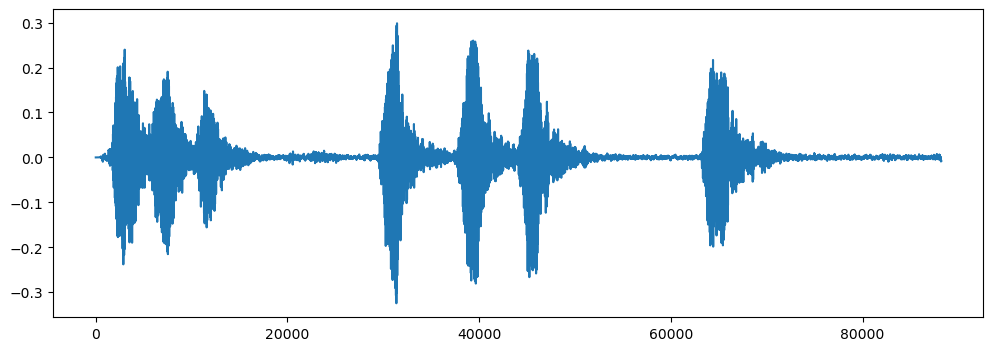

In [17]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)


In [18]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [19]:
mfccs

array([[-5.7041687e+02, -5.0580988e+02, -4.4661014e+02, ...,
        -4.8128598e+02, -4.7245877e+02, -4.6424646e+02],
       [ 3.2360138e+01,  9.3758621e+01,  1.4270895e+02, ...,
         1.0403226e+02,  1.1474959e+02,  1.1683490e+02],
       [ 2.6088993e+01,  3.4996731e+01,  4.0650402e+01, ...,
         1.1899885e+01,  1.7138020e+01,  1.3884659e+01],
       ...,
       [ 5.9291804e-01,  2.7261608e+00, -2.6107316e+00, ...,
        -2.7341051e+00, -3.7578502e+00, -5.8995886e+00],
       [-1.3069375e+00, -2.1206577e+00, -9.1924280e-01, ...,
        -1.2278645e+00, -3.3723910e+00, -4.1921663e+00],
       [-2.0638509e+00, -2.9027894e+00,  2.7276498e-01, ...,
        -1.3872089e+00, -3.3255322e+00, -8.4046578e-01]], dtype=float32)

In [21]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r"D:\UrbanSound8K\audio"
metadata=pd.read_csv(r"D:\UrbanSound8K\metadata\UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [22]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [23]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [04:46, 12.08it/s]C:\Users\ELKAYAN\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [11:23, 16.01it/s]C:\Users\ELKAYAN\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\ELKAYAN\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [11:55, 12.21it/s]


In [24]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [25]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [26]:
X.shape

(8732, 40)

In [27]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [28]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [29]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Dense , SimpleRNN, Flatten ,Dropout, Input, Activation,GRU,LSTM
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

# ANN 

In [74]:
model=Sequential()

model.add(Dense(200,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [75]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 200)               8200      
                                                                 
 activation_7 (Activation)   (None, 200)               0         
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 activation_8 (Activation)   (None, 100)               0         
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 50)               

In [76]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [77]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
236/246 [===========================>..] - ETA: 0s - loss: 8.7333 - accuracy: 0.1202
Epoch 1: val_loss improved from inf to 2.28412, saving model to saved_models\audio_classification.hdf5
246/246 [==============================] - 1s 3ms/step - loss: 8.5035 - accuracy: 0.1215 - val_loss: 2.2841 - val_accuracy: 0.1144
Epoch 2/200
232/246 [===========================>..] - ETA: 0s - loss: 2.4371 - accuracy: 0.1329
Epoch 2: val_loss improved from 2.28412 to 2.27145, saving model to saved_models\audio_classification.hdf5
246/246 [==============================] - 1s 3ms/step - loss: 2.4289 - accuracy: 0.1346 - val_loss: 2.2714 - val_accuracy: 0.1167
Epoch 3/200
244/246 [============================>.] - ETA: 0s - loss: 2.3166 - accuracy: 0.1273
Epoch 3: val_loss improved from 2.27145 to 2.25287, saving model to saved_models\audio_classification.hdf5
246/246 [==============================] - 1s 3ms/step - loss: 2.3172 - accuracy: 0.1278 - val_loss: 2.2529 - val_accuracy: 0.1430

In [78]:
pred=model.predict(X_test)

28/28 [==============================] - 0s 1ms/step


In [79]:
pred=model.predict(X_test)
y_true=[np.argmax(x) for x in y_test]
y_pred=[np.argmax(x) for x in pred]
    

28/28 [==============================] - 0s 1ms/step


In [80]:
import seaborn as sns 

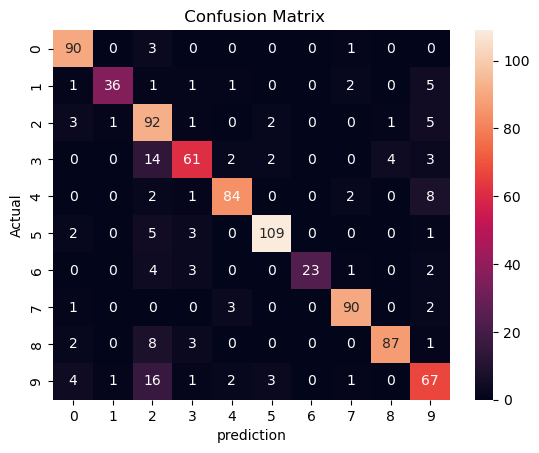

true
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        94
           1       0.95      0.77      0.85        47
           2       0.63      0.88      0.74       105
           3       0.82      0.71      0.76        86
           4       0.91      0.87      0.89        97
           5       0.94      0.91      0.92       120
           6       1.00      0.70      0.82        33
           7       0.93      0.94      0.93        96
           8       0.95      0.86      0.90       101
           9       0.71      0.71      0.71        95

    accuracy                           0.85       874
   macro avg       0.87      0.83      0.84       874
weighted avg       0.86      0.85      0.85       874



In [81]:
cf1 = confusion_matrix(y_true,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title( ' Confusion Matrix')
plt.show()
print("true")
print(classification_report(y_true,y_pred ))

In [82]:
loss,acc=model.evaluate(X_test,y_test)

28/28 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.8455


# CNN

In [88]:
model = Sequential()
model.add(Conv2D(
                 filters=64,  
                 kernel_size=2,              
                 input_shape=(4,10,1),     
                 activation='relu')
)

model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))


model.add(Dense(50, activation='relu'))
# End this multiclass model with 3 outputs and softmax
model.add(Dense(10, activation='softmax'))

model.summary ()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 3, 9, 64)          320       
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 7, 8)           4616      
                                                                 
 flatten_3 (Flatten)         (None, 56)                0         
                                                                 
 dense_20 (Dense)            (None, 64)                3648      
                                                                 
 dense_21 (Dense)            (None, 50)                3250      
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
Total params: 12,344
Trainable params: 12,344
Non-tra

In [89]:
model.compile(optimizer = 'adam' ,loss = 'categorical_crossentropy' ,metrics=['accuracy'])
model.fit(X_train.reshape(-1,4,10,1),y_train,batch_size=256 ,epochs=200)

Epoch 1/200
31/31 [==============================] - 1s 7ms/step - loss: 2.3225 - accuracy: 0.1952
Epoch 2/200
31/31 [==============================] - 0s 7ms/step - loss: 1.7253 - accuracy: 0.3991
Epoch 3/200
31/31 [==============================] - 0s 7ms/step - loss: 1.4134 - accuracy: 0.5207
Epoch 4/200
31/31 [==============================] - 0s 7ms/step - loss: 1.2641 - accuracy: 0.5719
Epoch 5/200
31/31 [==============================] - 0s 8ms/step - loss: 1.1447 - accuracy: 0.6094
Epoch 6/200
31/31 [==============================] - 0s 8ms/step - loss: 1.0564 - accuracy: 0.6476
Epoch 7/200
31/31 [==============================] - 0s 7ms/step - loss: 0.9969 - accuracy: 0.6652
Epoch 8/200
31/31 [==============================] - 0s 7ms/step - loss: 0.9460 - accuracy: 0.6798
Epoch 9/200
31/31 [==============================] - 0s 7ms/step - loss: 0.8968 - accuracy: 0.7018
Epoch 10/200
31/31 [==============================] - 0s 7ms/step - loss: 0.8446 - accuracy: 0.7222
Epoch 11/

28/28 [==============================] - 0s 2ms/step


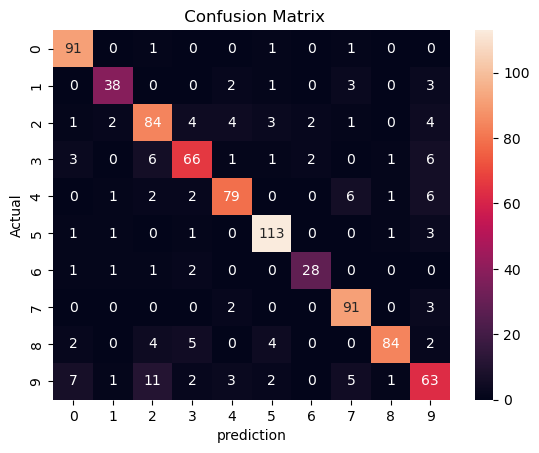

true
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        94
           1       0.86      0.81      0.84        47
           2       0.77      0.80      0.79       105
           3       0.80      0.77      0.79        86
           4       0.87      0.81      0.84        97
           5       0.90      0.94      0.92       120
           6       0.88      0.85      0.86        33
           7       0.85      0.95      0.90        96
           8       0.95      0.83      0.89       101
           9       0.70      0.66      0.68        95

    accuracy                           0.84       874
   macro avg       0.84      0.84      0.84       874
weighted avg       0.84      0.84      0.84       874



In [90]:
pred=model.predict(X_test.reshape(-1,4,10,1))
y_true=[np.argmax(x) for x in y_test]
y_pred=[np.argmax(x) for x in pred]
cf1 = confusion_matrix(y_true,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title( ' Confusion Matrix')
plt.show()
print("true")
print(classification_report(y_true,y_pred ))

In [91]:
loss,acc=model.evaluate(X_test.reshape(-1,4,10,1),y_test)
acc*100 ,loss


28/28 [==============================] - 0s 2ms/step - loss: 1.4037 - accuracy: 0.8432


(84.32494401931763, 1.4036896228790283)

In [94]:
!pip install pydub

In [115]:
import librosa

import IPython as ip

y1, sample_rate1 = librosa.load(r"D:\UrbanSound8K\audio\fold1\7061-6-0-0.wav", mono=True)
y2, sample_rate2 = librosa.load(r"D:\UrbanSound8K\audio\fold1\7383-3-0-0.wav", mono=True)

# MERGE
#librosa.display.waveplot((y1+y2)/2, sr=int((sample_rate1+sample_rate2)/2))

# REPRODUCE
ip.display.Audio((y1+y2)/2, rate=int((sample_rate1+sample_rate2)/2))

ValueError: operands could not be broadcast together with shapes (49613,) (88200,) 